In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.datasets import ascent

In [2]:
ascent_image = ascent()

In [3]:
def show_image( image):
    plt.grid( False)
    plt.gray()
    plt.axis( "off")
    plt.imshow( image)
    plt.show()

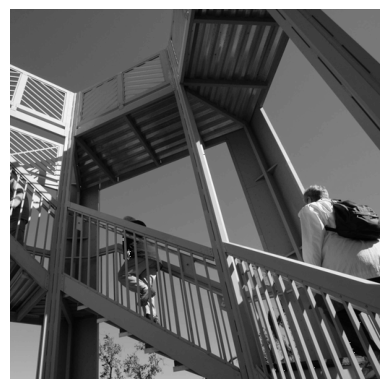

In [4]:
show_image( ascent_image)

In [5]:
def convolve( input_image, filter, weight = 1):
    image_transformed = np.copy( input_image)

    size_x, size_y = image_transformed.shape

    for x in range( 1, size_x - 1):
        for y in range( 1, size_y - 1):
            convolution = 0.0
            convolution += ( input_image[ x - 1, y - 1] * filter[ 0][ 0])
            convolution += ( input_image[ x - 1, y] * filter[ 0][ 1])
            convolution += ( input_image[ x - 1, y + 1] * filter[ 0][ 2])
            convolution += ( input_image[ x, y - 1] * filter[ 1][ 0])
            convolution += ( input_image[ x, y] * filter[ 1][ 1])
            convolution += ( input_image[ x, y + 1] * filter[ 1][ 2])
            convolution += ( input_image[ x + 1, y - 1] * filter[ 2][ 0])
            convolution += ( input_image[ x + 1, y] * filter[ 2][ 1])
            convolution += ( input_image[ x + 1, y + 1] * filter[ 2][ 2])

            convolution *= weight

            if convolution < 0:
                convolution = 0

            if convolution > 255:
                convolution = 255

            image_transformed[ x, y] = convolution

    return image_transformed

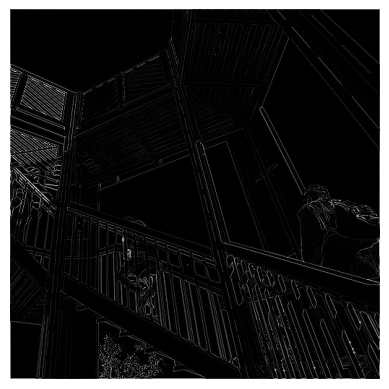

In [6]:
filter1 = [
    [ 0, 1, 0],
    [ 1, -4, 1],
    [ 0, 1, 0]
]

filtered_image1 = convolve( ascent_image, filter1)

show_image( filtered_image1)

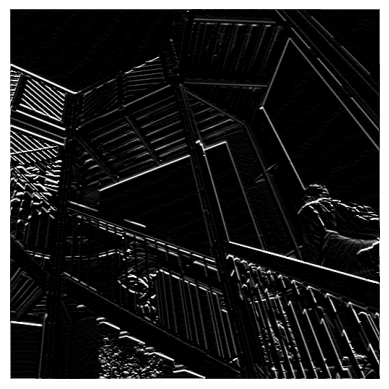

In [7]:
filter2 = [
    [ -1, -2, -1],
    [ 0, 0, 0],
    [ 1, 2, 1]
]

filtered_image2 = convolve( ascent_image, filter2)

show_image( filtered_image2)

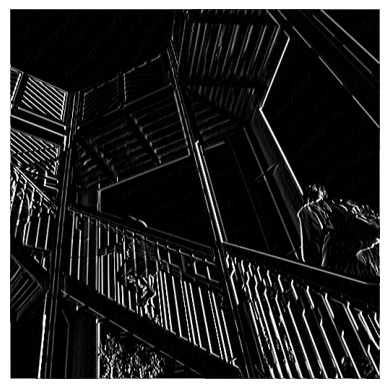

In [8]:
filter3 = [
    [ -1, 0, 1],
    [ -2, 0, 2],
    [ -1, 0, 1]
]

filtered_image3 = convolve( ascent_image, filter3)

show_image( filtered_image3)

In [9]:
def max_pooling( image):
    size_x, size_y = image.shape

    new_x = int( size_x / 2)
    new_y = int( size_y / 2)

    newImage = np.zeros( ( new_x, new_y))

    for x in range( 0, size_x, 2):
        for y in range( 0, size_y, 2):
            pixels = []

            pixels.append( image[ x, y])
            pixels.append( image[ x + 1, y])
            pixels.append( image[ x, y + 1])
            pixels.append( image[ x + 1, y + 1])

            newImage[ int( x / 2), int( y / 2)] = np.max( pixels)

    return newImage

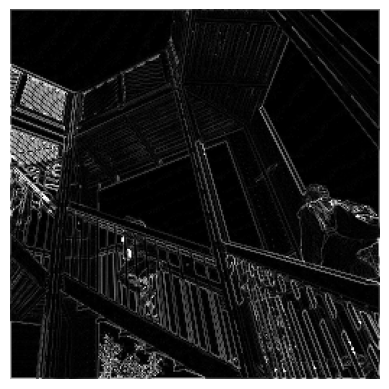

In [10]:
max_image1 = max_pooling( filtered_image1)

show_image( max_image1)

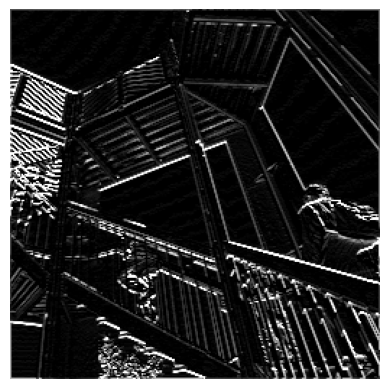

In [11]:
max_image2 = max_pooling( filtered_image2)

show_image( max_image2)

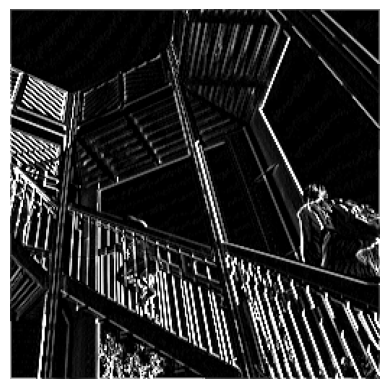

In [12]:
max_image3 = max_pooling( filtered_image3)

show_image( max_image3)